# Assignment 1

## Set up

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style 
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from datetime import datetime

## Preprocessing

### Reviewing the Dataset

In [10]:
# Inspect the data
df = pd.read_csv('train_v2.csv')
df.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,...,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,target,id
0,F,50.0,20/05/98,29.200000,2.0,Play 100,BS210,62.0,153.000000,185.0,...,OK,0.150531,0.246536,0.706735,0.046729,0.203034,F,F,0,K262360
1,M,25.0,16/12/96,46.533333,1.0,CAT 100,ASAD90,146.0,718.800000,98.0,...,OK,0.188988,0.780710,0.178886,0.040404,0.273249,F,F,1,K170160
2,F,46.0,27/08/97,38.066667,1.0,CAT 50,WC95,160.0,322.800000,7.0,...,OK,0.239300,0.722633,0.277367,0.000000,0.205025,F,F,0,K331610
3,F,59.0,13/07/98,27.400000,1.0,CAT 50,BS110,84.0,317.400001,57.0,...,OK,0.221467,0.662492,0.337508,0.000000,0.050090,F,F,0,K332460
4,F,25.0,08/01/99,21.433333,1.0,Play 300,WC95,14.0,309.600000,326.0,...,OK,0.107509,0.321896,0.663132,0.014972,0.090509,F,F,0,K394220


The dataframe has 39 columns related to telco customers + target variable churn

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  5044 non-null   object 
 1   Age                     5044 non-null   float64
 2   Connect_Date            5044 non-null   object 
 3   L_O_S                   5044 non-null   float64
 4   Dropped_Calls           5044 non-null   float64
 5   tariff                  5044 non-null   object 
 6   Handset                 5044 non-null   object 
 7   Peak_calls_Sum          5044 non-null   float64
 8   Peak_mins_Sum           5044 non-null   float64
 9   OffPeak_calls_Sum       5044 non-null   float64
 10  OffPeak_mins_Sum        5044 non-null   float64
 11  Weekend_calls_Sum       5044 non-null   float64
 12  Weekend_mins_Sum        5044 non-null   float64
 13  International_mins_Sum  5044 non-null   float64
 14  Nat_call_cost_Sum       5044 non-null   

Each user is identified through a unique customer ID. There are 36  variables used to predict the target feature – customer churn. Customer churn is defined as users who have left within the last month.
Note that dropped_call_ratio, usage_band, call_cost_per_min have some missing values

Let’s count the number of customers in the dataset who have churned: 

In [13]:
df["target"].value_counts()

target
0    4299
1     745
Name: count, dtype: int64

0 means no churn, 1 means churn 

Only around 17% of the customers in the dataset have churned. This means that we are dealing with an imbalanced classification problem. We will need to perform some feature engineering to create a balanced training dataset before building the predictive model.

### Exploratory Data Analysis

Now, let’s perform some exploratory data analysis to gain a better understanding of the independent variables in the dataset and their relationship with customer churn. 

First , we create lists of the attributes that are continuous and categorical: 

In [31]:
categorical = ["Gender", "tariff", "Handset", "Usage_Band", "Tariff_OK", "high Dropped calls", "No Usage"]

continuous = ['Age', 'L_O_S', 'Dropped_Calls', 'Peak_calls_Sum', 'Peak_mins_Sum',  'OffPeak_calls_Sum', 'OffPeak_mins_Sum', 'Weekend_calls_Sum',
             'Weekend_mins_Sum', 'International_mins_Sum', 'Nat_call_cost_Sum','AvePeak', 'AveOffPeak', 'AveWeekend', 'National_calls', 'National mins',
             'AveNational', 'All_calls_mins', 'Dropped_calls_ratio', 'Mins_charge', 'call_cost_per_min', 'actual call cost', 'Total_call_cost', 
             'Total_Cost', 'average cost min','Peak ratio', 'OffPeak ratio', 'Weekend ratio', 'Nat-InterNat Ratio', ]

date = "Connect_Date"

*The reason why I haven't been including date as "days since connected" is because days since connected will depend on today's day so I don't know if it is really a good approach ? But to think about*

Then, we analyze the categorical variables:

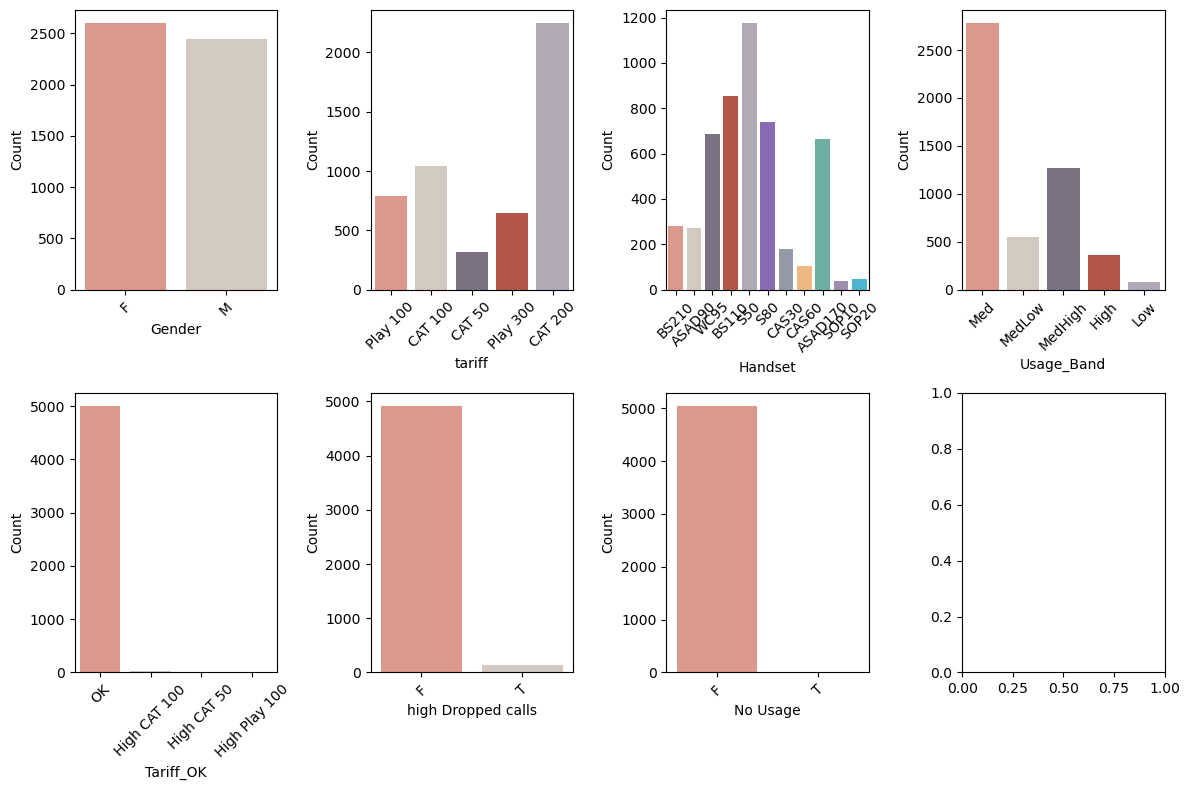

In [19]:
df_cat = df[categorical]
colors_cat = ['#E8907E', '#D5CABD', '#7A6F86', '#C34A36', '#B0A8B9', '#845EC2', '#8f9aaa', '#FFB86F', '#63BAAA', '#9D88B3', '#38c4e3']
fig, ax = plt.subplots(2, 4, figsize=(12, 8))

for index, column in enumerate(df_cat.columns):

    plt.subplot(2, 4, index + 1)
    sns.countplot(x=column, data=df, palette=colors_cat)
    
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()

Since we can't see the distributions for "Tariff_OK" and "No Usage" very well, printing those:

In [20]:
print(df['Tariff_OK'].value_counts())
print(df['No Usage'].value_counts())

Tariff_OK
OK               5001
High CAT 100       28
High CAT 50         9
High Play 100       6
Name: count, dtype: int64
No Usage
F    5040
T       4
Name: count, dtype: int64


*Question: What are those features exactly? Some speak by themselves but not all of them*
- Gender: There is an equal distribution of customer's gender
- tariff: Most customers are in the category CAT 200 
- Handset: Most customers use a S50 Handset
- Usage_Band: Med > MedHigh > MedLow > High > Low
- Tariff_OK: Almost every customer is OK
- high Dropped calls: Also big majority F
- No usage: Almost every customer F

We can also look at the distributions of the continuous variables: 

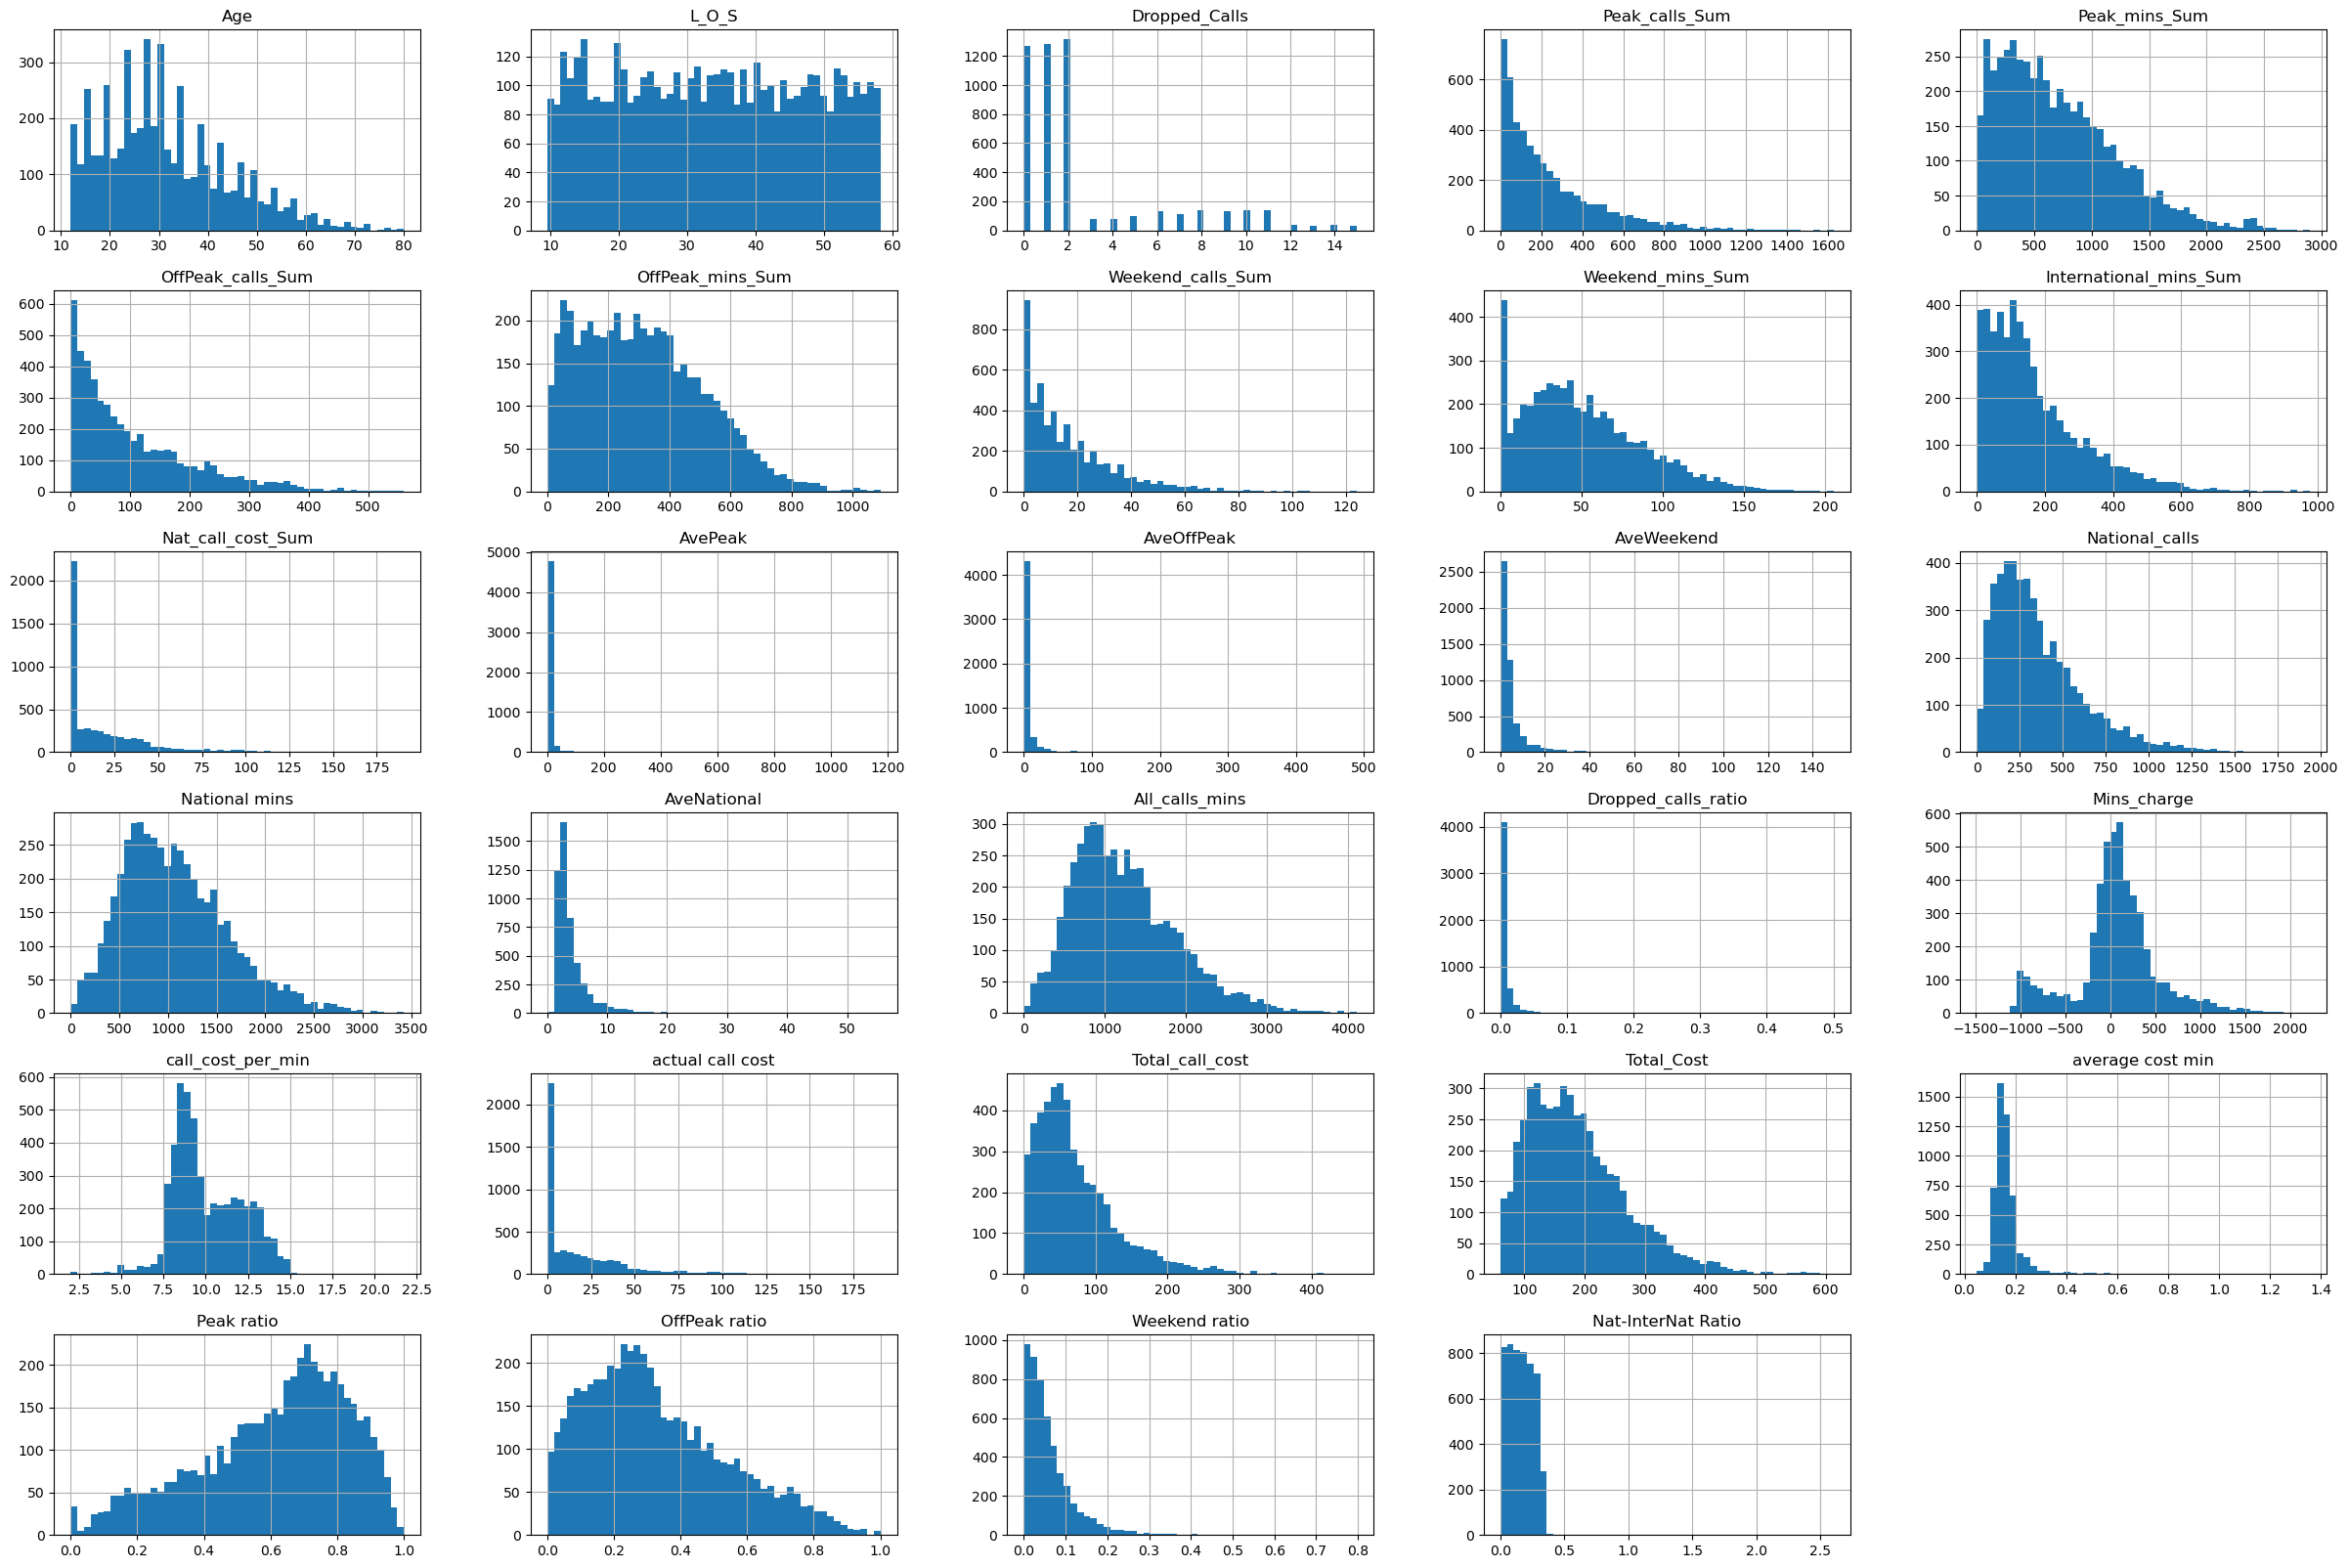

In [32]:
df[continuous].hist(bins=50, figsize=(30,20))
plt.show()

*Interpret those plots: Do they add much value?*

Now, let’s look into the relationship between cost and customer churn. In the real world, users tend to unsubscribe to their mobile service provider and switch to a different brand if they find the monthly subscription cost too high. Let’s check if that behavior is reflected in our dataset:

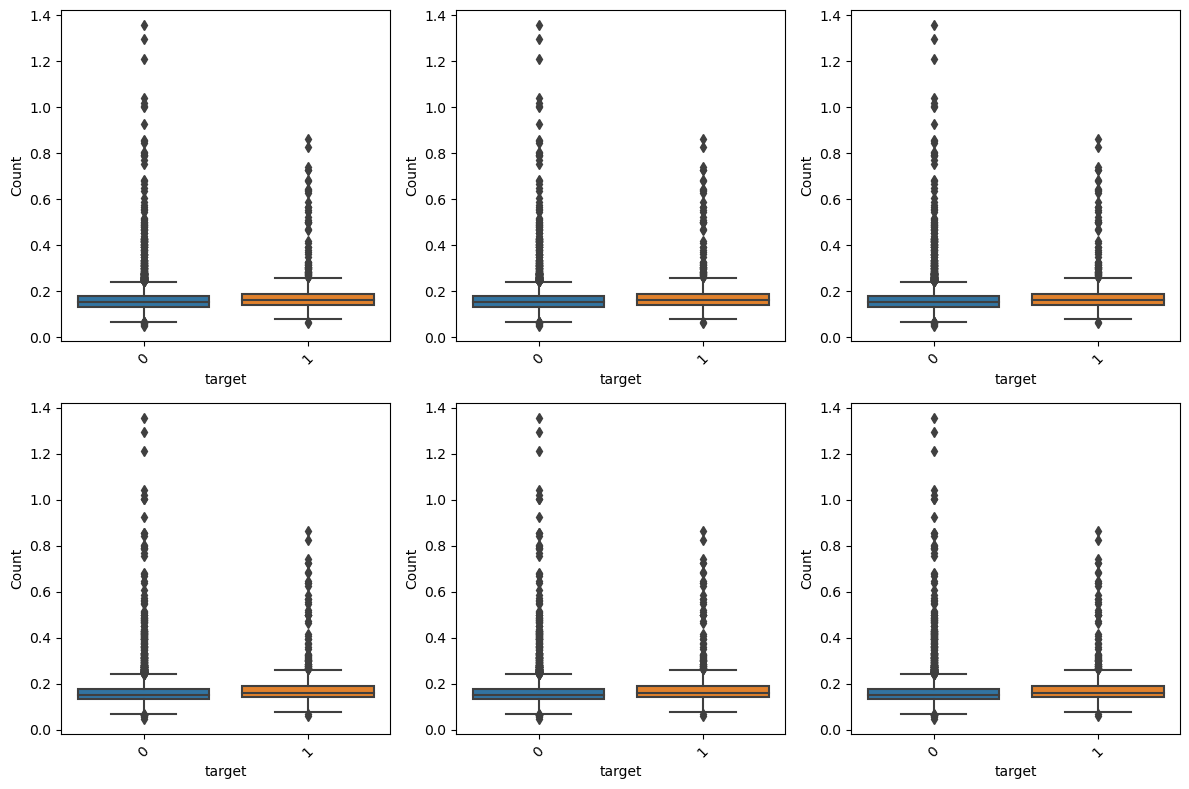

In [23]:
cost_features = ['Nat_call_cost_Sum','call_cost_per_min', 'actual call cost', 'Total_call_cost','Total_Cost', 'average cost min']

fig, ax = plt.subplots(2, 3, figsize=(12, 8))
    
for index, column in enumerate(cost_features):
    plt.subplot(2, 3, index + 1)
    sns.boxplot(x='target', y=feature, data=df)
    
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()

The assumption above is not really true. Customers who churned don't seem to have much higher costs at a first view. 

Let’s analyze the relationship between customer churn the other categorical variables captured in the dataset:

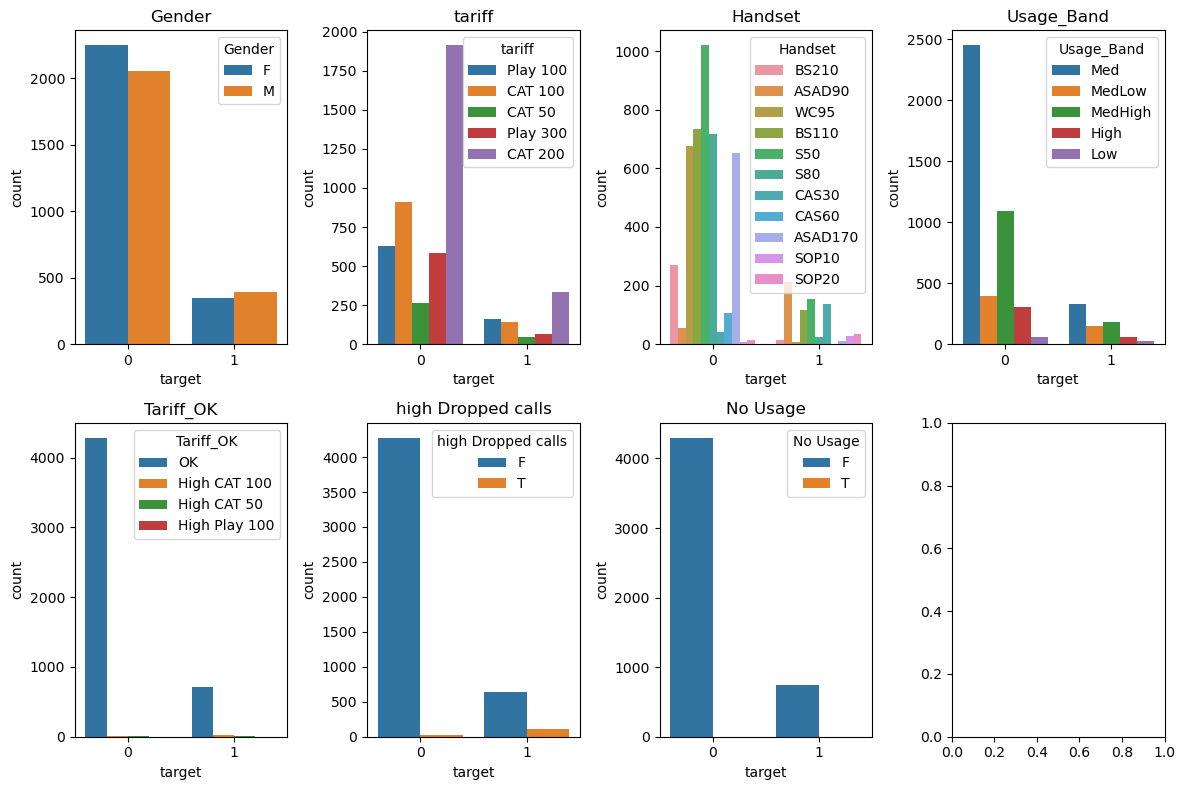

In [28]:
fig, ax = plt.subplots(2, 4, figsize=(12, 8))

for i, col in enumerate(categorical):
    ax = plt.subplot(2, 4, i+1)
    sns.countplot(x ="target", hue = str(col), data = df)
    ax.set_title(f"{col}")

plt.tight_layout()


Let’s look into each attribute:

- Gender: ...
- tariff: ...
- Handset: ...
- Usage band: ...
- Tariff_OK: ...
- high Dropped calls: ...
- No usage: ...


We can take a look at the correlations between the variables: 

<Axes: >

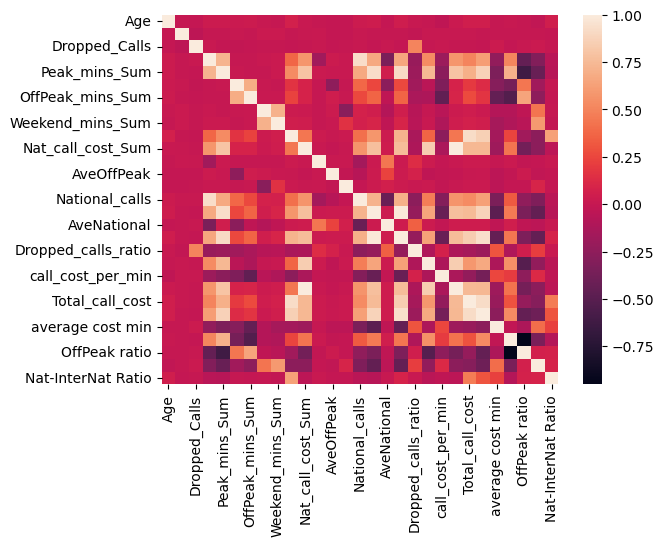

In [39]:
sns.heatmap(df[continuous].corr())

In [40]:
high_cors = df[continuous].corr().abs().unstack().sort_values(ascending=False).drop_duplicates()
print(high_cors[high_cors>=0.75])

Age                     Age                       1.000000
Nat_call_cost_Sum       actual call cost          0.999074
All_calls_mins          National mins             0.983268
Peak ratio              OffPeak ratio             0.951518
All_calls_mins          Total_Cost                0.935317
National mins           Peak_mins_Sum             0.927886
Peak_calls_Sum          National_calls            0.924017
Total_call_cost         Total_Cost                0.920932
                        International_mins_Sum    0.920707
All_calls_mins          Peak_mins_Sum             0.910463
National mins           Total_Cost                0.871373
Total_Cost              Peak_mins_Sum             0.867152
International_mins_Sum  Total_Cost                0.855865
Total_call_cost         All_calls_mins            0.845393
Nat_call_cost_Sum       Mins_charge               0.840526
Mins_charge             actual call cost          0.840098
Peak_mins_Sum           Nat_call_cost_Sum         0.8001

*There are many highly correlated variables.. I am not sure how this affects our model*
*If there are many correlated variables, we can consider doing PCA without losing to much value* 

To do: Take a look at which variablees are the most correlated with target? 

### Splitting the train data
Splitting the train into a train & test set, since no target values in the test set provided by the teacher. 
We can consider adding a validation set for hyperparameters tuning later

In [36]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=123)
print("Training set has size " + str(len(train_set)) + ", and test set has size " + str(len(test_set)))

Training set has size 4035, and test set has size 1009


### Clean the Data

*To do: Look at the summary again and make sure no extra cleaning is needed*

We can drop the column id: it is unique to each customer and has no predictive value:


In [37]:
train_set.drop(["id"], axis=1, inplace=True)
print(df.columns)

Index(['Gender', 'Age', 'Connect_Date', 'L_O_S', 'Dropped_Calls', 'tariff',
       'Handset', 'Peak_calls_Sum', 'Peak_mins_Sum', 'OffPeak_calls_Sum',
       'OffPeak_mins_Sum', 'Weekend_calls_Sum', 'Weekend_mins_Sum',
       'International_mins_Sum', 'Nat_call_cost_Sum', 'AvePeak', 'AveOffPeak',
       'AveWeekend', 'National_calls', 'National mins', 'AveNational',
       'All_calls_mins', 'Dropped_calls_ratio', 'Usage_Band', 'Mins_charge',
       'call_cost_per_min', 'actual call cost', 'Total_call_cost',
       'Total_Cost', 'Tariff_OK', 'average cost min', 'Peak ratio',
       'OffPeak ratio', 'Weekend ratio', 'Nat-InterNat Ratio',
       'high Dropped calls', 'No Usage', 'target', 'id'],
      dtype='object')


Convert uint8 columns to float64:

In [38]:
uint8_columns = train_set.select_dtypes(include=['uint8']).columns
train_set[uint8_columns] = train_set[uint8_columns].astype('float64')

### Encoding categorical variables
The categorical variables in the dataset need to be converted into a numeric format before we can feed them into the machine learning model. We will perform the encoding using Scikit-Learn’s label encoder.

In [41]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_cat = train_set[categorical].apply(le.fit_transform)
df_cat.head()

,Gender,tariff,Handset,Usage_Band,Tariff_OK,high Dropped calls,No Usage
43,0,1,7,0,3,0,0
1079,0,1,0,3,3,0,0
1993,0,3,10,4,3,0,0
2497,1,4,9,2,3,1,0
2892,0,0,7,2,0,0,0


Notice that all the categorical values in the dataset have now been replaced with numbers.

Merge the dataframe we just created with the previous one:

In [42]:
num_features = df[['Gender','tariff','Handset','Usage_Band','Tariff_OK','high Dropped calls','No Usage']]
finaldf = pd.merge(num_features, df_cat, left_index=True, right_index=True)

### Oversampling

### Handling Missing Values

Add 0's to the missing columns of the test set for the dummy variables:

In [ ]:
train_set, test_set = train_set.align(test_set, join="outer", axis=1, fill_value=0)

Data imputation: 

In [20]:
from sklearn.impute import SimpleImputer
x_train=train_set.drop('target', axis=1)
x_test=test_set.drop('target', axis=1)
y_train=train_set['target']
y_test=test_set['target']

# Impute missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)

imputer = SimpleImputer(strategy='mean')
x_test = imputer.fit_transform(x_test)

### Data Transformations

Standardize continuous columns (*For which technique is it needed?*)

In [ ]:
#Standardize continuous columns
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
train_set[continuous] = std_scaler.fit_transform(train_set[continuous])
test_set[continuous] = std_scaler.fit_transform(test_set[continuous])

## Analytics
- Logistic regression
- KNN
- Bagging
- Boosting

### Gradient Boosting

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

# Initialising and fitting the gradient Boosting
gb = GradientBoostingClassifier(n_estimators = 100, learning_rate =0.1, max_depth=3, random_state=42 )

gb.fit(x_train,y_train)
#Predictions
y_pred = gb.predict_proba(x_test)[:,1]

#Calculate AUC
auc = roc_auc_score(y_test, y_pred)
print("AUC score:", auc)

AUC score: 0.9291460756418576


### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

#Initialize and fit logistic regression, first with equal classification costs
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(x_train, y_train)

#Predictions
y_pred_log = log_reg.predict_proba(x_test)[:,1]

#Calculate AUC
auc_log = roc_auc_score(y_test, y_pred_log)

print("AUC score for unweighted classes:", auc_log)


#Now for imbalanced classication costs
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight="balanced")
log_reg.fit(x_train, y_train)

#Predictions
y_pred_log = log_reg.predict_proba(x_test)[:,1]

#Calculatie AUC
auc_log = roc_auc_score(y_test, y_pred_log)

print("AUC score for weighted classes:", auc_log)

AUC score for unweighted classes: 0.9251318657548379
AUC score for weighted classes: 0.9314464466962845


### K Nearest Neighbors

In [23]:
from sklearn.neighbors import KNeighborsClassifier

#Initialize and fit logistic regression, first with equal classification costs
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(x_train, y_train)

#Predictions
y_pred_knn = knn.predict_proba(x_test)[:,1]

#Calculate AUC
auc_knn= roc_auc_score(y_test, y_pred_knn)

print("AUC score for KNN:", auc_knn)

AUC score for KNN: 0.8024675951346943


### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

#Initialize and fit logistic regression, first with equal classification costs
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

#Predictions
y_pred_rf = rf.predict_proba(x_test)[:,1]

#Calculate AUC
auc_rf= roc_auc_score(y_test, y_pred_rf)

print("AUC score for RF:", auc_rf)

AUC score for RF: 0.9236509758897817


## Post-processing
- Interpret, Evaluate & Deploy the model

Print all the results in a single table:

In [ ]:
# to do 

Avg cost test *Is this the right way?*

In [25]:
#Function that calculates the sum of avg_cost_min with the highest predicted probabilities
#prediction is the predicted probabilities from the model.
#The argument testSet should be the unstandardized testset
def avgCostSum(prediction, testSet):
    #Get an array of sorted predictions in descending order
    index = np.argsort(prediction)[::-1]
    #Select the sorted avg_cost_min column from the unstandardized dataframe, then get the 20 highest
    avg_cost_min = testSet.iloc[index,]
    avg_cost_min = avg_cost_min[["average cost min", "target"]][0:20]
    #Return the sum of the top 20 for those that were correctly predicted
    return avg_cost_min[avg_cost_min["target"]==1]["average cost min"].sum()

avgCostSum(y_pred_log, test_set_unstand)
print("Sum of top 20 avg_cost_min:")
print("Weighted Logistic Regression:" ,avgCostSum(y_pred_log, test_set_unstand))
print("K nearest Neighbors: " ,avgCostSum(y_pred_knn, test_set_unstand))
print("Gradient Boost: ", avgCostSum(y_pred, test_set_unstand))
print("Random Forest: ", avgCostSum(y_pred_rf, test_set_unstand))





Sum of top 20 avg_cost_min:
Weighted Logistic Regression: 3.8559190000000005
K nearest Neighbors:  2.2229780000000003
Gradient Boost:  3.303951
Random Forest:  3.092823
